In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

#### Сделайте небольшой класс, описывающий какую-то сущность на ваш выбор (организм/тип данных/что-то ещё). В классе должен быть конструктор и пара методов

In [2]:
class Anime:
    def __init__(self, name, episodes, episode_duration, main_characters):
        self.name = name
        self.episodes = episodes
        self.episode_duration = episode_duration
        self.main_characters = main_characters.copy()

    def print_name(self):
        print('My favorite anime is', self.name)

    def duration(self):
        print('Anime duration is', self.episodes * self.episode_duration, 'minutes.')

    def characters_list(self):
        for character in self.main_characters:
            print(character)


In [3]:
Fullmetal_alchemist = Anime('Fullmetal alchemist', 64, 23, ['Edward Elric', 'Alphonse Elric'])

In [4]:
Fullmetal_alchemist.episodes

64

In [5]:
Fullmetal_alchemist.print_name()

My favorite anime is Fullmetal alchemist


In [6]:
Fullmetal_alchemist.duration()

Anime duration is 1472 minutes.


In [7]:
Fullmetal_alchemist.characters_list()

Edward Elric
Alphonse Elric


#### Напишите класс, описывающий РНК, у него должны быть:  
Конструктор - принимает последовательность РНК и создаёт объект с ней  
Метод трансляции - возвращает строку, соответствующую белку из этой РНК по стандартному коду  
Метод обратной транскрипции - возвращает строку, соответствующую ДНК из этой РНК  

In [8]:
class RNA:
    translation_table = {
    'AUA':'I', 'AUC':'I', 'AUU':'I', 'AUG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACU':'T',
    'AAC':'N', 'AAU':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGU':'S', 'AGA':'R', 'AGG':'R',                
    'CUA':'L', 'CUC':'L', 'CUG':'L', 'CUU':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCU':'P',
    'CAC':'H', 'CAU':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGU':'R',
    'GUA':'V', 'GUC':'V', 'GUG':'V', 'GUU':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCU':'A',
    'GAC':'D', 'GAU':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGU':'G',
    'UCA':'S', 'UCC':'S', 'UCG':'S', 'UCU':'S',
    'UUC':'F', 'UUU':'F', 'UUA':'L', 'UUG':'L',
    'UAC':'Y', 'UAU':'Y', 'UAA':'_', 'UAG':'_',
    'UGC':'C', 'UGU':'C', 'UGA':'_', 'UGG':'W',
    }

    complemetarity = {
    'A':'T', 'U':'A', 'C':'G', 'G':'C'
    }

    def __init__(self, sequence):
        self.sequence = sequence

    def translation(self):
        protein = ''
        if len(self.sequence)%3 == 0:
            for i in range(0, len(self.sequence), 3):
                codon = self.sequence[i:i + 3]
                protein += RNA.translation_table[codon]
        else:
            print('Wrong sequence')
        return protein

    def transcription(self):
        DNA = ''
        for letter in self.sequence:
            DNA += RNA.complemetarity[letter]
        DNA = DNA[::-1]
        return DNA


In [9]:
My_RNA = RNA('AUUACGGGGCAUUUA')

In [10]:
My_RNA.translation()

'ITGHL'

In [11]:
My_RNA.transcription()

'TAAATGCCCCGTAAT'

#### Напишите класс, унаследовавшись от сэтов, который будет содержать в себе только положительные числа при создании и не будет добавлять неположительные элементы (подсказка - методы конструктора и add)

In [12]:
class My_set(set):
    def __init__(self, numbers):
        numbers = [number for number in numbers if number > 0]
        super().__init__(numbers)

    def add(self, new_number):
        if new_number > 0:
            super().add(new_number)


In [13]:
test = My_set([4, -1, 0, 100, -4, -100, 0, 8, 1000])
print(test)
test.add(5)
print(test)
test.add(-5)
print(test)

My_set({100, 8, 4, 1000})
My_set({100, 4, 5, 8, 1000})
My_set({100, 4, 5, 8, 1000})


#### Создайте класс для сбора статистик по фастам.
##### Входные параметры:  
Путь к фаста файлу   
##### Методы:   
Подсчёт числа последовательностей в фаста файле  
Построение гистограммы длин последовательностей  
Подсчёт GC состава  
Построение гистограммы частоты 4-меров (по оси x каждый из возможных 4-меров, а по y - их частота)  
Переопределение метода для вывода информации при принте (достаточно текста с указанием путя к файлу)  
Выполнение всех реализованных методов по подсчёту метрик  
Можно придумать дополнительные метрики и реализовать их (по 1 баллу за каждую)  

In [32]:
class Fasta:
    def __init__(self, path):
        self.path = path
        self.sequences = []
        with open(path, 'r') as file:
            curr_str = ''
            for line in file:
                if line[0] != '>':
                    curr_str += line[:-1]
                elif len(curr_str) > 0:
                    self.sequences.append(curr_str)
            self.sequences.append(curr_str)

    def length_hist(self):
        length_list = [len(sequence) for sequence in self.sequences]
        plt.hist(length_list)
        plt.show()

    def count_GC(self):
        counter = 0
        GC_counter = 0
        for sequence in tqdm(self.sequences):
            for letter in sequence:
                if letter.upper() in 'GC':
                    GC_counter += 1
                counter += 1
        return GC_counter / counter

    def count_4(self):
        counter = {}
        for sequence in tqdm(self.sequences):
            for i in range(len(sequence) - 3):
                qmer = sequence[i:i + 4]
                if qmer in counter:
                    counter[qmer] += 1
                else:
                    counter[qmer] = 1
        x_labels = []
        y_height = []

        for qmer in counter:
            x_labels.append(qmer)
            y_height.append(counter[qmer])

        plt.figure(figsize=(30, 6), dpi=80)
        plt.bar(x_labels, height=y_height)
        plt.xticks(rotation=90)

    def __str__(self):
        return self.path


In [33]:
my_fasta = Fasta('/Users/alexgorbonos/Documents/IB_practice/Practice3/SRR292678/scaffolds.fasta')

In [17]:
print(my_fasta)

/Users/alexgorbonos/Documents/IB_practice/Practice3/SRR292678/scaffolds.fasta


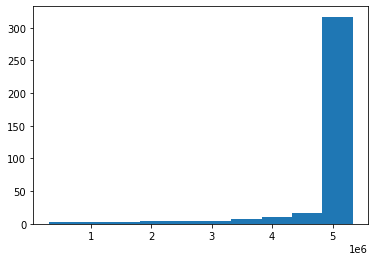

In [18]:
my_fasta.length_hist()

In [19]:
my_fasta.count_GC()

  0%|          | 0/372 [00:00<?, ?it/s]

0.5053984079336109

  0%|          | 0/372 [00:00<?, ?it/s]

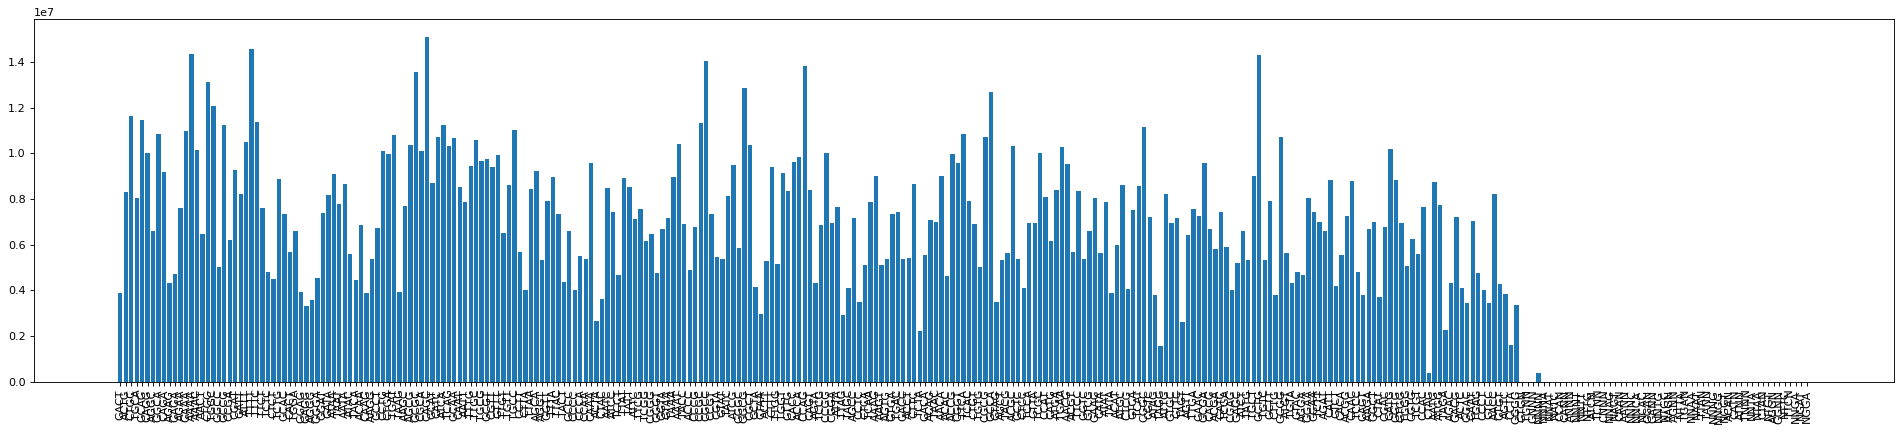

In [34]:
my_fasta.count_4()